In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# Линейный классификатор

Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. 
Если это можно сделать без ошибок, то обучающая выборка называется *линейно разделимой*.

<img src="../../img/logit.png">

Рассмотрим задачу бинарной классификации, причем метки целевого класса обозначим "+1" (положительные примеры) и "-1" (отрицательные примеры).
Один из самых простых линейных классификаторов может быть представлен вот таким образом:

$$\large a(\vec{x}) = sign(\vec{w}^Tx),$$

где
 - $\vec{x}$ – вектор признаков примера (вместе с единицей);
 - $\vec{w}$ – веса в линейной модели (вместе со смещением $w_0$);
 - $sign(\bullet)$ – функция "сигнум", возвращающая знак своего аргумента;
 - $a(\vec{x})$ – ответ классификатора на примере $\vec{x}$.



$\large M_I(w) = \langle w,x_i\rangle y_i$ - отступ объекта $x_i$ от разделяющей гиперплоскости

Выражение $\large M(\vec{x_i}) = y_i\vec{w}^T\vec{x_i}$ – это своего рода "уверенность" модели в классификации объекта $\vec{x_i}$: 

- если отступ большой (по модулю) и положительный, это значит, что метка класса поставлена правильно, а объект находится далеко от разделяюящей гиперплоскости (такой объект классифицируется уверенно).
- если отступ большой (по модулю) и отрицательный, значит метка класса поставлена неправильно, а объект находится далеко от разделюящей гиперплоскости (скорее всего такой объект – аномалия, например, его метка в обучающей выборке поставлена неправильно).
- если отступ малый (по модулю), то объект находится близко к разделюящей гиперплоскости, а  знак отступа определяет, правильно ли объект классифицирован.

Метод обучения - минимизация количества ошибок:  

$$\large Q(w) = \sum^{\ell}_{i=1}[a(x_i,w]y_i < 0] \le \sum^{\ell}_{i=1}\mathcal{L}((\vec{w}^Tx) y_i) \to \min_{w}$$

## Часто используемые функции потерь

$V(M) = (1-M)_{+}$ - кусочно-линейная(SVM)  
$H(M) = (-M)_+$ - кусочно-линейная(правило Хебба)  
$L(M) = 2(1+e^M)^{-1}$ - сигмоидная  
$E(M) = e^{-M}$ - экспоненциальная(AdaBoost)

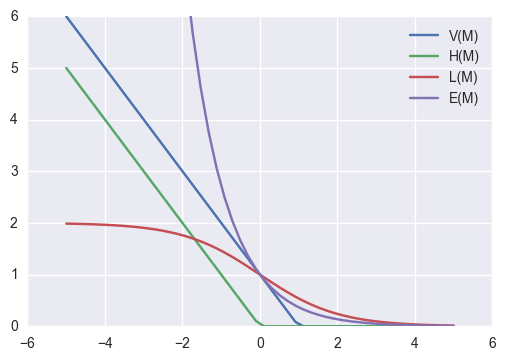

In [2]:
x =np.linspace(-5,5)
y= [np.max([0.0, 1.0-m]) for m in x]
plt.ylim([0,6])
plt.plot(x,y, label='V(M)')
plt.plot(x,[np.max([0, -m]) for m in x], label='H(M)')
plt.plot(x,[ 2/(1+np.exp(m)) for m in x], label='L(M)')
plt.plot(x,[ np.exp(-m) for m in x], label='E(M)')
plt.legend()
plt.show()

# Минимизация эмпирического риска

$$ Q(w) = \sum^{\ell}_{i=1} \mathcal{L}_i(w) \to \min_{w} $$

Численная минимизация методом градиентного спуска:

w^{(0)} := начальное приближение

$$w^{t+1} := w^{t}-h\nabla Q(w^{(t)}),   \nabla Q(w) =(\frac{Q(w)}{\partial w_j})^{n}_{j=0} $$
h - шаг обучения

$$ w^{(t+1)}:=w^t-h\sum^{\ell}_{i=1}\nabla \mathcal{L}(w^{(t)})$$


<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" width=50%>

Хороший пример того, как это работает: http://www.onmyphd.com/?p=gradient.descent

Генерация данных

In [3]:
# первый класс
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=5, scale=1)]
train_labels = np.r_[train_labels, np.ones(100)]

In [4]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

In [5]:
def draw_clf(clf, train_data):
    xx, yy = get_grid(train_data)
    df = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    prediction = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    #plt.pcolormesh(xx, yy, df, cmap='autumn')
    plt.pcolormesh(xx, yy, prediction, cmap='autumn')
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidth=1.5)
    plt.show()

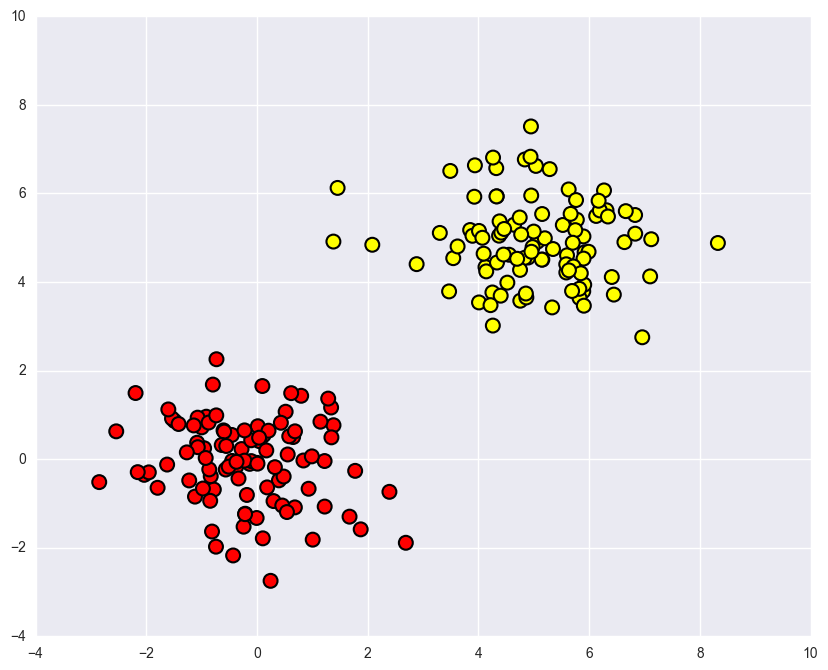

In [6]:
plt.rcParams['figure.figsize'] = (10,8)
xx, yy = get_grid(train_data)
#predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5)

# Основной метод:

In [7]:
import sklearn.linear_model

In [8]:
clf = sklearn.linear_model.SGDClassifier()

In [9]:
clf.fit(train_data, train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [10]:
clf.predict([[0,0], [1.55,0], [6, 5]])

array([ 0.,  0.,  1.])

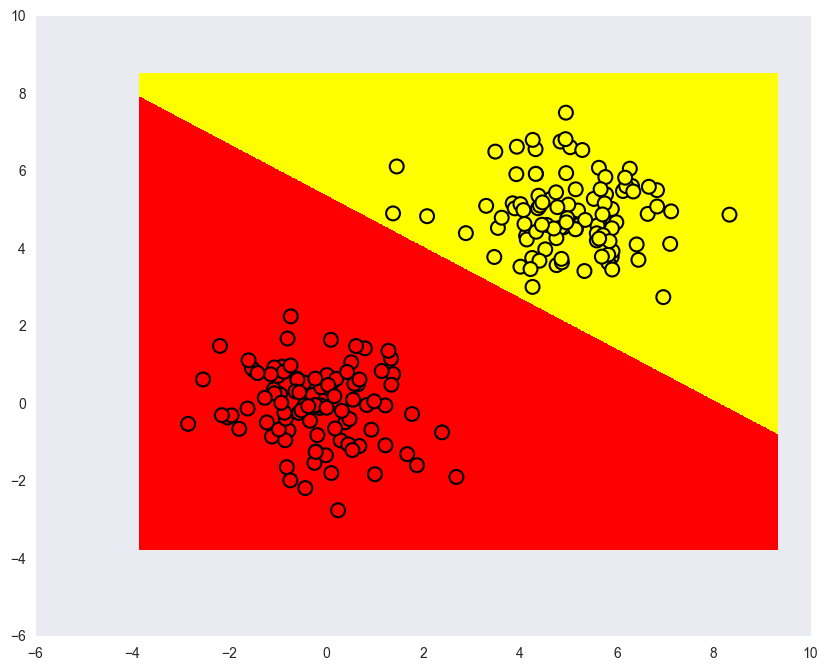

In [11]:
draw_clf(clf, train_data)

In [12]:
# первый класс
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2, scale=2)]
train_labels = np.r_[train_labels, np.ones(100)]

# Логистическая регрессия

$$\large a(\vec{x}) = \sigma(\vec{w}^Tx)$$

$$\large \sigma(x) = \frac{1}{1 + e^{-x}}$$

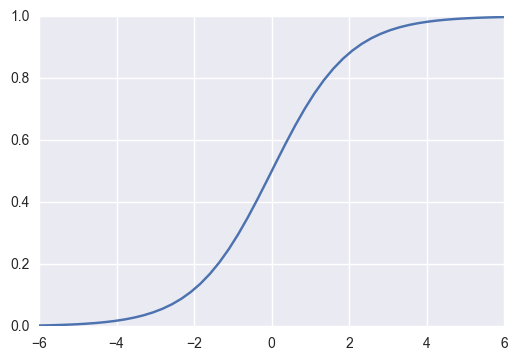

In [13]:
x = np.linspace(-6, 6)
plt.figure(figsize=(6,4))
plt.plot(x, [ 1/(1+np.exp(-xx)) for xx in x ])

<img src='http://alumni.media.mit.edu/~tpminka/courses/36-350.2001/lectures/day31/ex20-plot1.png'>

In [14]:
data = pd.read_csv('microchip_tests.txt',
                   header=None, names = ('test1','test2','released'))
# информация о наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [15]:
X = data.ix[:,:2].values
y = data.ix[:,2].values

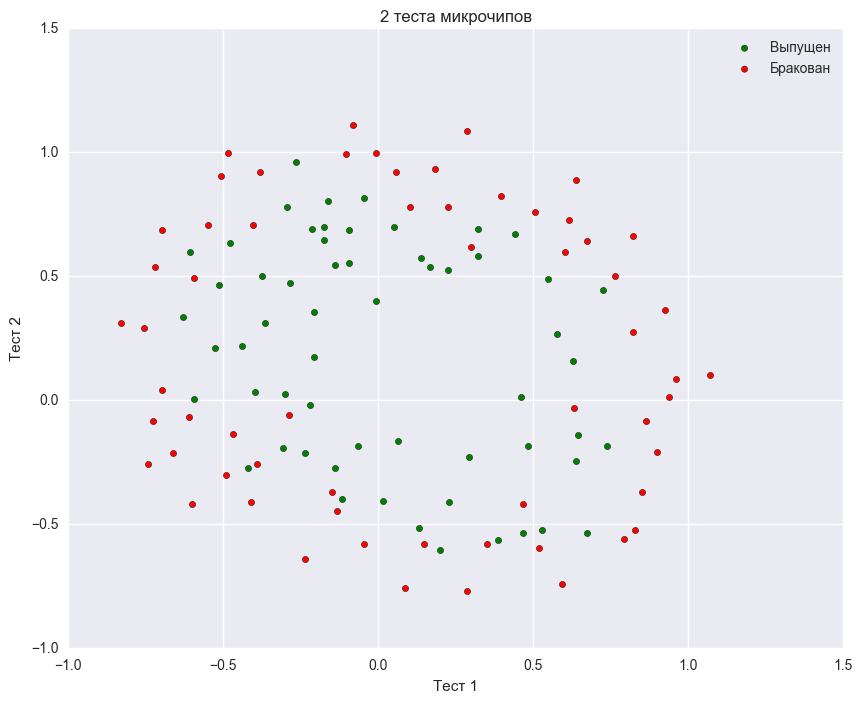

In [16]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend();

In [17]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))


    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

Полиномиальными признаками до степени $d$ для двух переменных $x_1$ и $x_2$ мы называем следующие:

$$\large \{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j=d, i,j \in \mathbb{N}}$$

Например, для $d=3$ это будут следующие признаки:

$$\large 1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

Нарисовав треугольник Пифагора, Вы сообразите, сколько таких признаков будет для $d=4,5...$ и вообще для любого $d$.
Попросту говоря, таких признаков экспоненциально много, и строить, скажем, для 100 признаков полиномиальные степени 10 может оказаться затратно (а более того, и не нужно). 


In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)

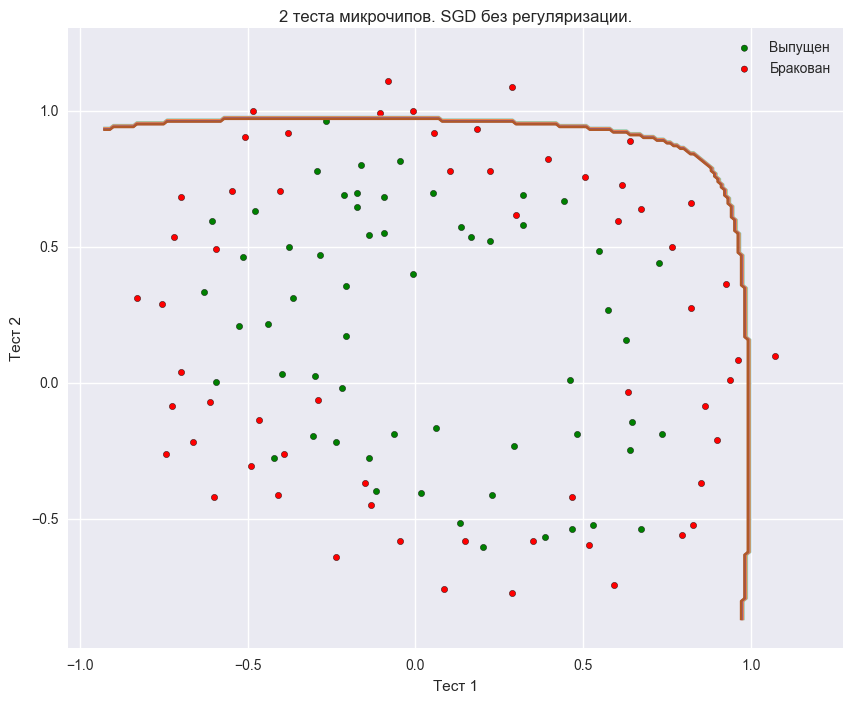

In [51]:
clf = sklearn.linear_model.SGDClassifier(alpha=0.999)
clf.fit(X_poly,y)
plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. SGD без регуляризации.')
plt.legend();

Доля правильных ответов классификатора на обучающей выборке: 0.661


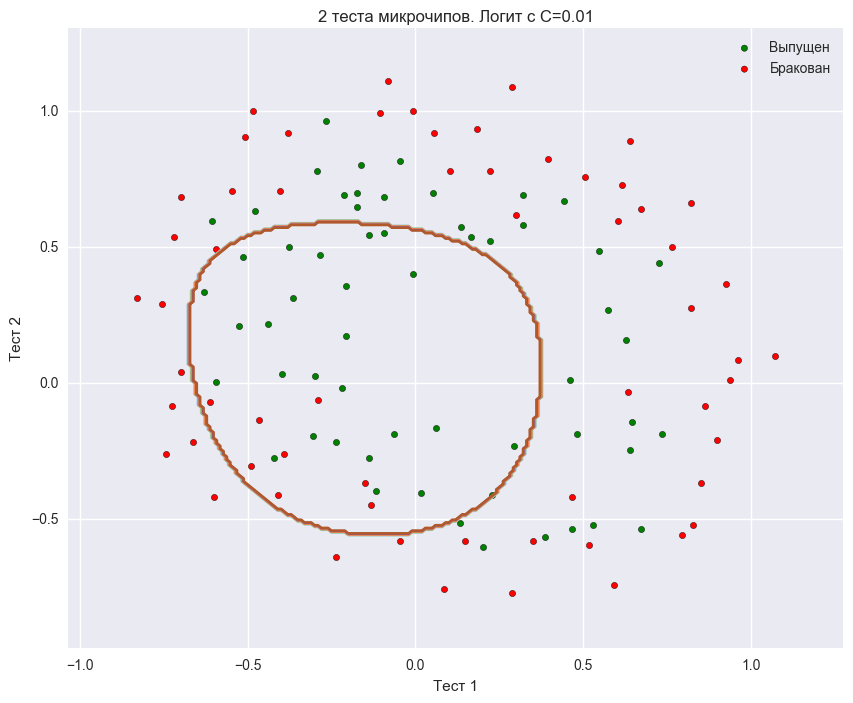

In [52]:
from sklearn.linear_model import LogisticRegression
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.831


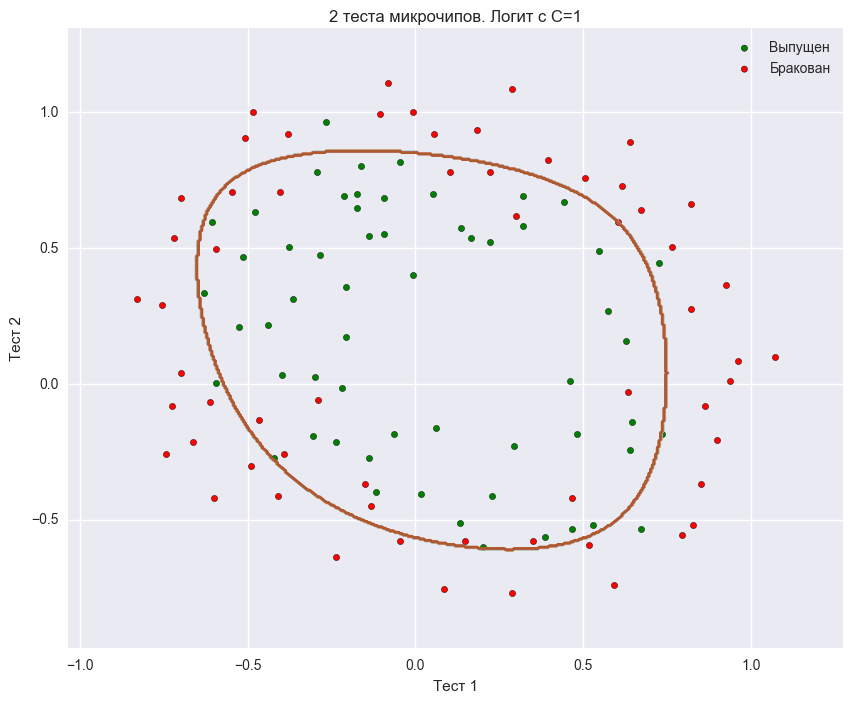

In [53]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=1')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.881


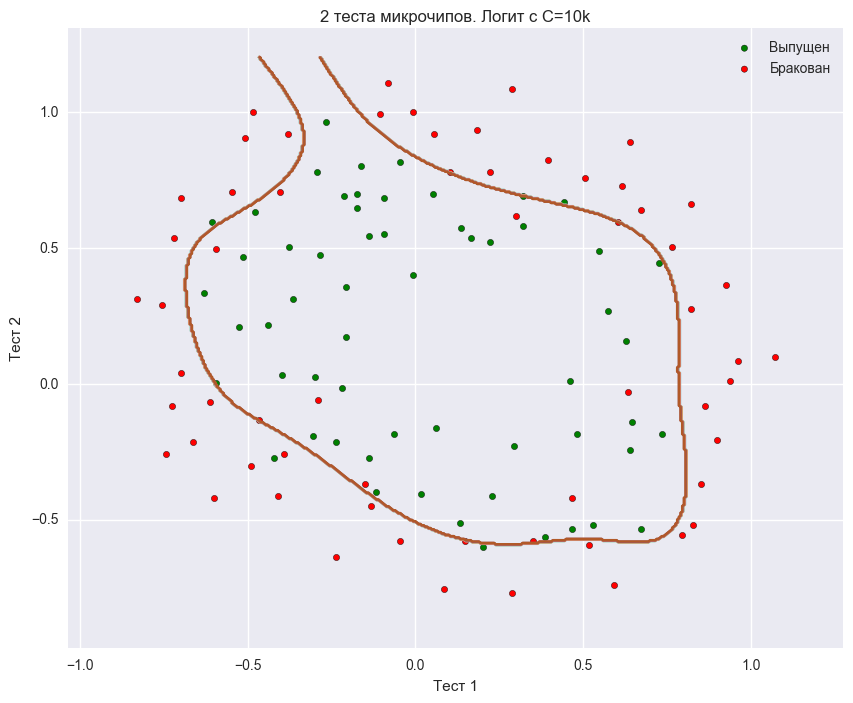

In [54]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=10k')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


LogisticRegressionCV(Cs=array([  1.00000e-02,   1.02334e-02, ...,   9.77192e+02,   1.00000e+03]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=1)

In [56]:
logit_searcher.C_

array([ 0.96375787])

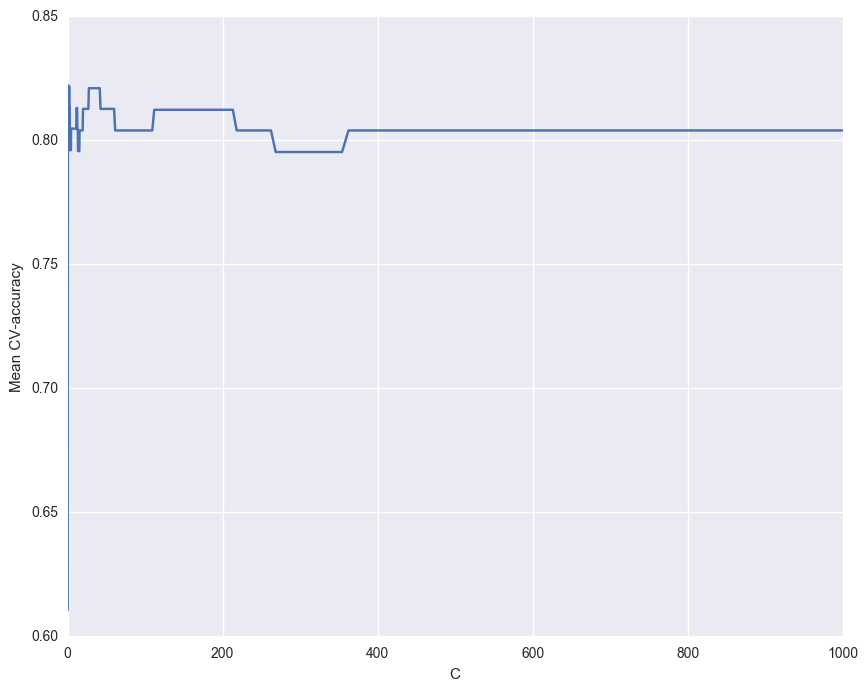

In [57]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

В SGD есть следующие настройки регуляризации penalty : ‘none’, ‘l2’, ‘l1’, or ‘elasticnet’

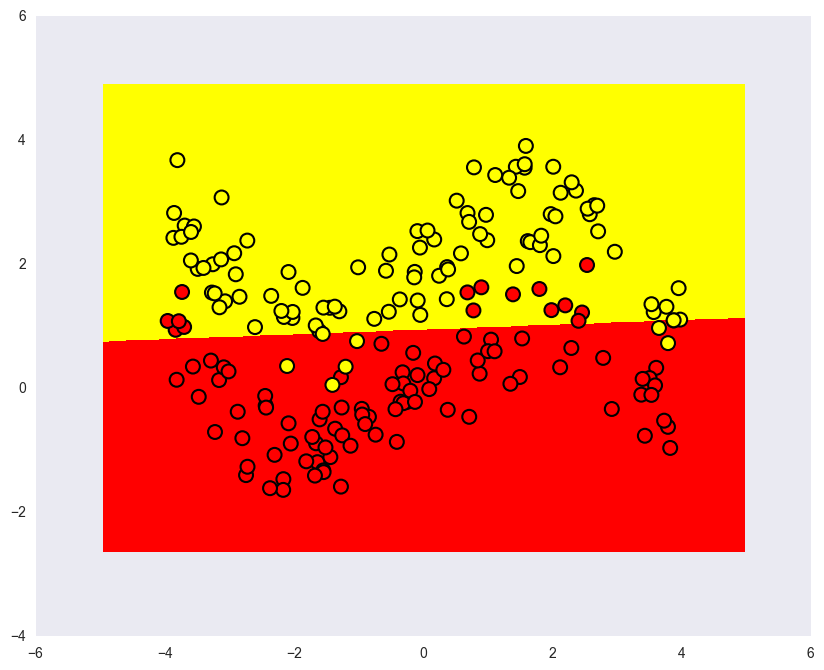

In [17]:
x = np.linspace(-4, 4)
y1 = np.sin(x)/2

# первый класс
train_data = np.random.uniform(low=-4, high=4, size=(100,2))
train_data[:,1] =  np.sin(train_data[:,0]) + np.random.normal(scale=0.5, size=100)
train_labels = np.zeros(100)

# добавляем второй класс

train_data = np.r_[train_data, np.random.uniform(low=-4, high=4, size=(100,2))]
train_data[100:,1] = np.sin(train_data[100:,0])+ 2 + np.random.normal(scale=0.5,size=100)
train_labels = np.r_[train_labels, np.ones(100)]

clf = sklearn.linear_model.LogisticRegression()
clf.fit(train_data, train_labels)
draw_clf(clf, train_data)

Проблема переобучения
Возможные причины переобучения:
* слишком мало объектов, слишком много признаков
* признаки линейно связаны между собой

Как понять, что мы переобучились?
* Слишком большие найденные веса $|w_j|$

Будем штрафовать за большие веса по следующему принципу:


$$\large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$

### Добавим штраф за веса
Штраф за квадраты весов будет значительно возрастать при увеличении самих весов:

$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$

Такая форма регуляризации называется $L_2$ регуляризацией и штрафует за большие веса.

#### Добавим еще один штраф за веса:

$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$

Такая регуляризация исключает неинформативные для решения задачи признаки.

Вместе эти два метода называются ElasticNet.

Penalty: none


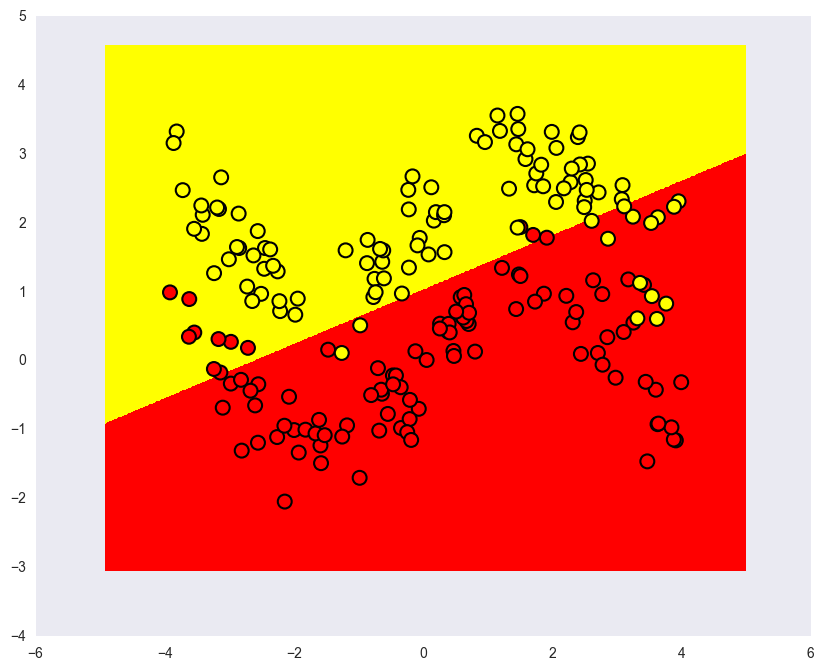

Penalty: l2


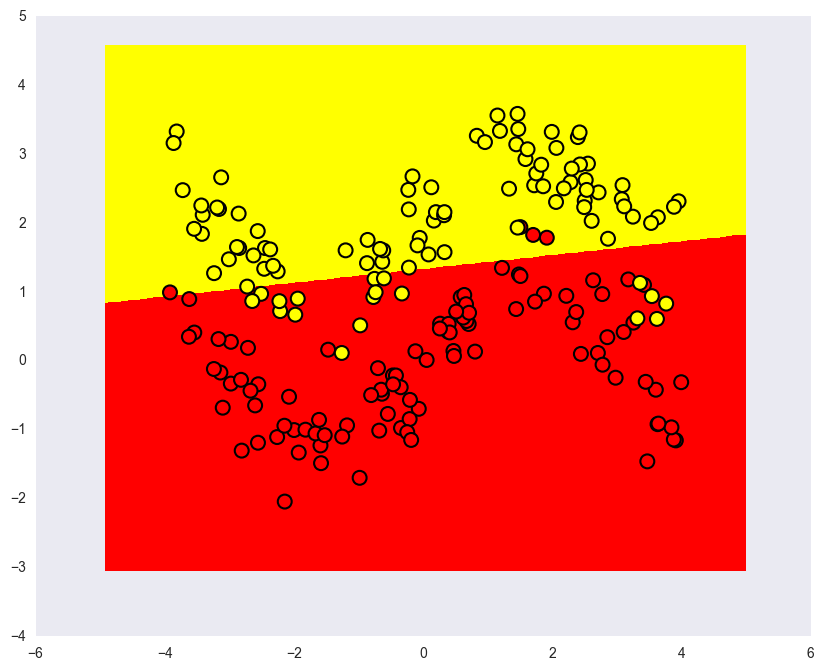

Penalty: l1


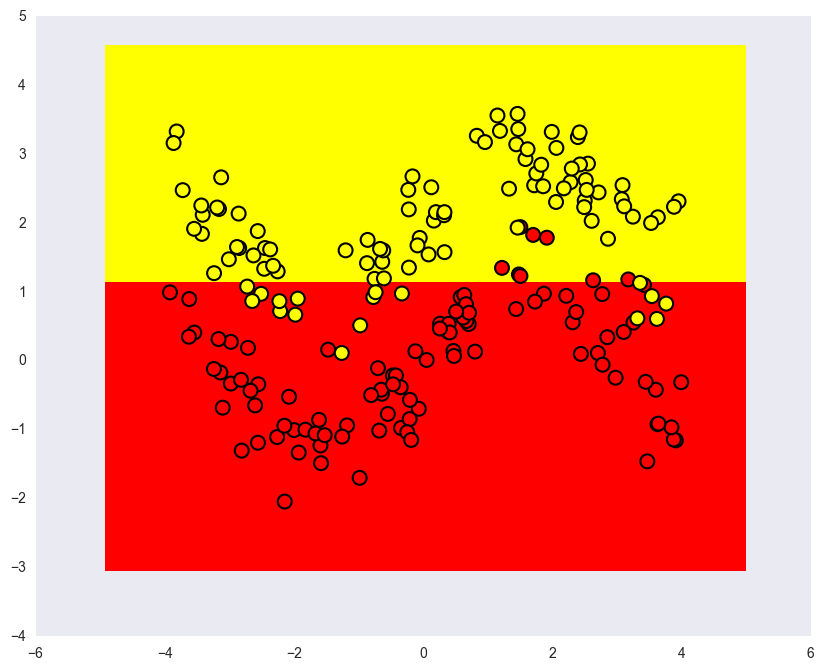

Penalty: elasticnet


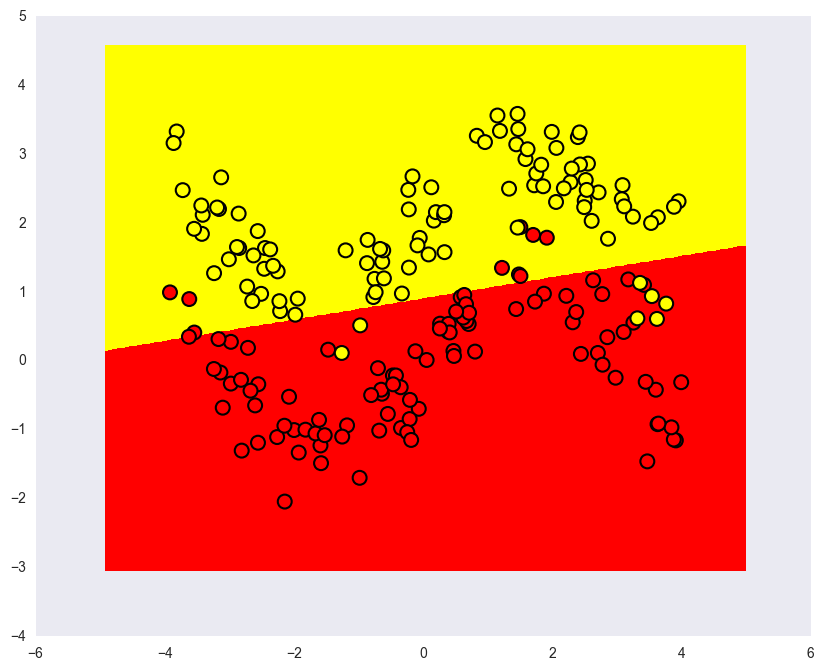

In [253]:
for penalty in ['none', 'l2','l1', 'elasticnet']:
    clf = sklearn.linear_model.SGDClassifier(penalty=penalty)
    clf.fit(train_data, train_labels)
    print('Penalty: {}'.format(penalty))
    draw_clf(clf, train_data)

##  SVC
Возможные варианты функции потерь для классификации:‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’
По умолчанию SGD работает с функцией потерь hinge и на самом деле представляет собой SVM - метод опорных векторов.
В этом случае мы ищем оптимум вот такой функции:
$$ \large \sum^{\ell}_{i=1}(1-M_i(w,w_0))_+ + \frac{1}{2C}||w||^2 \to \min_{w,w_0}$$

<img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_sgd_separating_hyperplane_0011.png'/>

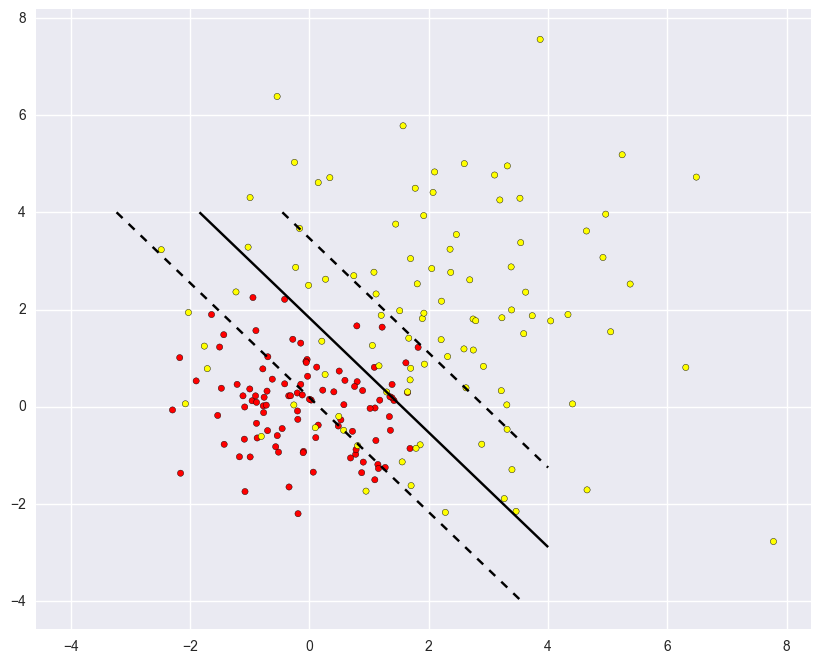

In [72]:
from sklearn.datasets.samples_generator import make_blobs

# fit the model
clf = sklearn.linear_model.SGDClassifier(loss="hinge", alpha=0.01, n_iter=200, fit_intercept=True)
clf.fit(train_data, train_labels)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-4, 4, 10)
yy = np.linspace(-4, 4, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap="autumn")

plt.axis('tight')
plt.show()

# SVC - линейный метод, который может работать нелинейно

In [58]:
from sklearn.svm import SVC

In [62]:
#clf = SVC(kernel='sigmoid')
#clf = SVC(kernel='poly')
clf = SVC(kernel='rbf')

In [63]:
clf.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

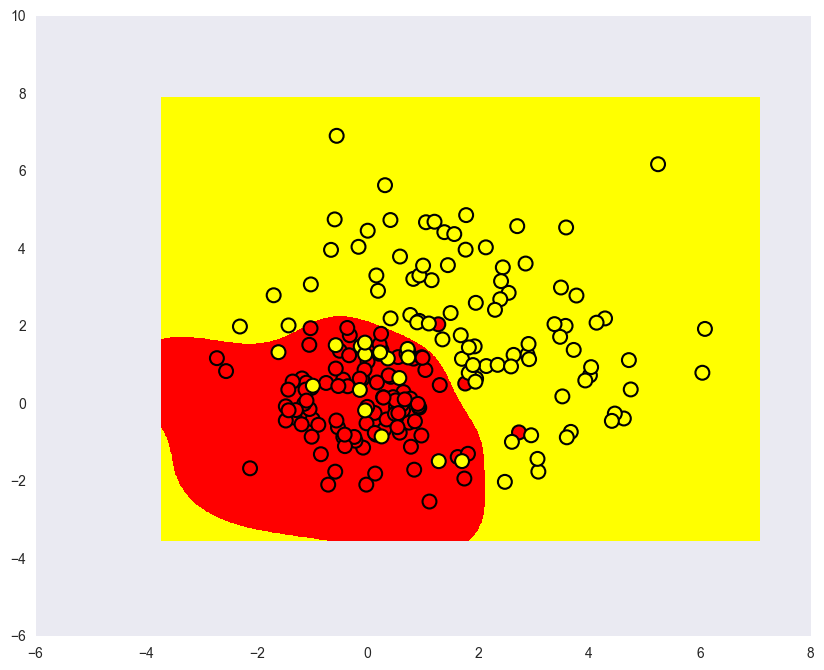

CPU times: user 9.32 s, sys: 1.49 s, total: 10.8 s
Wall time: 10.4 s


In [65]:
%%time
draw_clf(clf, train_data)